# **Data Analysis Interview Challenge**

### load datasets and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


## **Part 1 ‐ Exploratory data analysis**

In [2]:
df = pd.read_json('logins.json')
#check first 5 rows
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
#check last 5 rows
df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [4]:
# check for null or missing datas
df.isna().sum()

login_time    0
dtype: int64

In [5]:
# Convert 'login_time' column to datetime format and set it as the index
df['login_time'] = pd.to_datetime(df['login_time'])
df.set_index('login_time', inplace=True)
df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


#### Aggregate login counts based on 15-minute time intervals

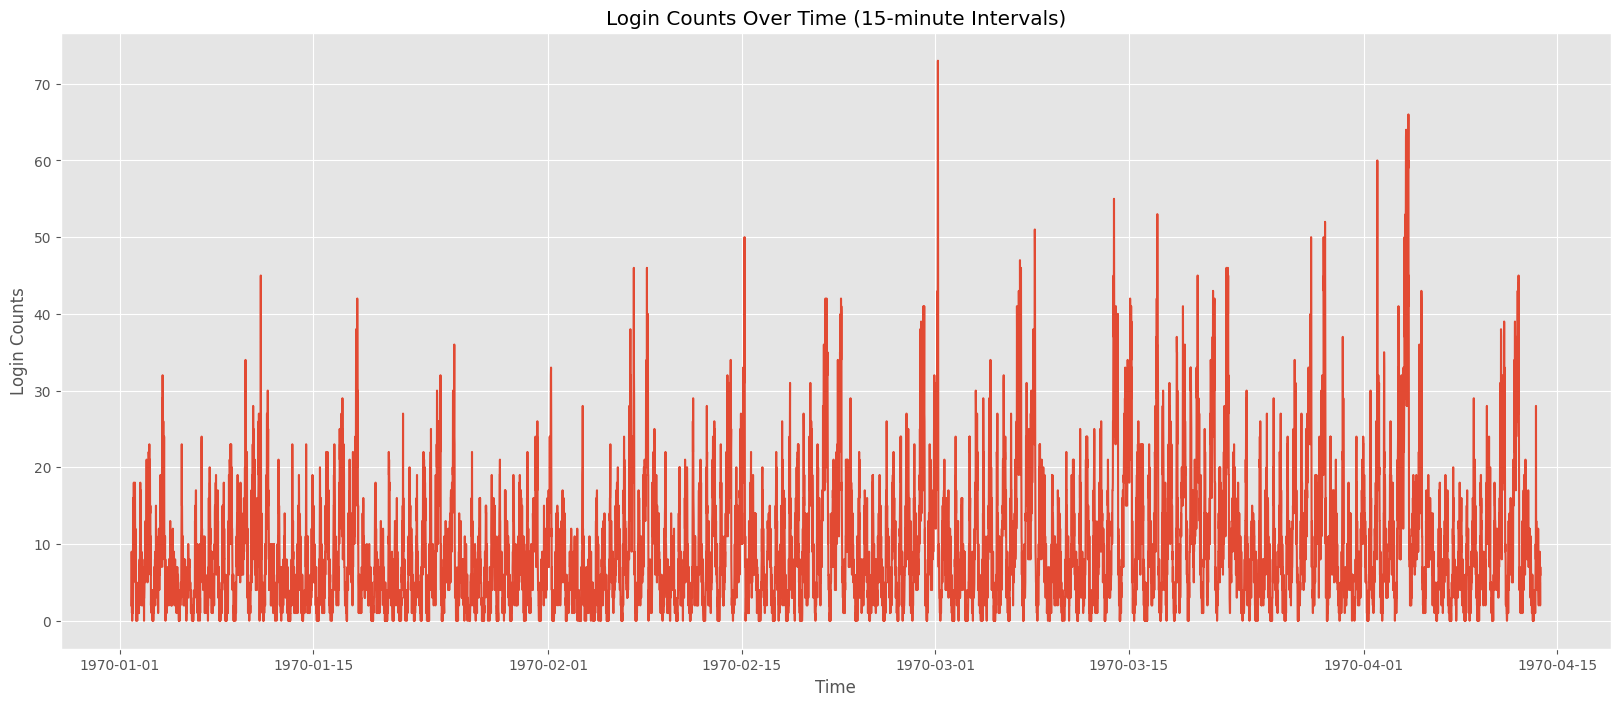

In [6]:
# Aggregate login counts based on 15-minute time intervals
login_counts = df.resample('15t').size()
# Plot the time series of login counts
plt.figure(figsize=(20, 8))
plt.plot(login_counts)
plt.title('Login Counts Over Time (15-minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.grid(True)
plt.show()

#### plot Daily counts by mean to find the trend

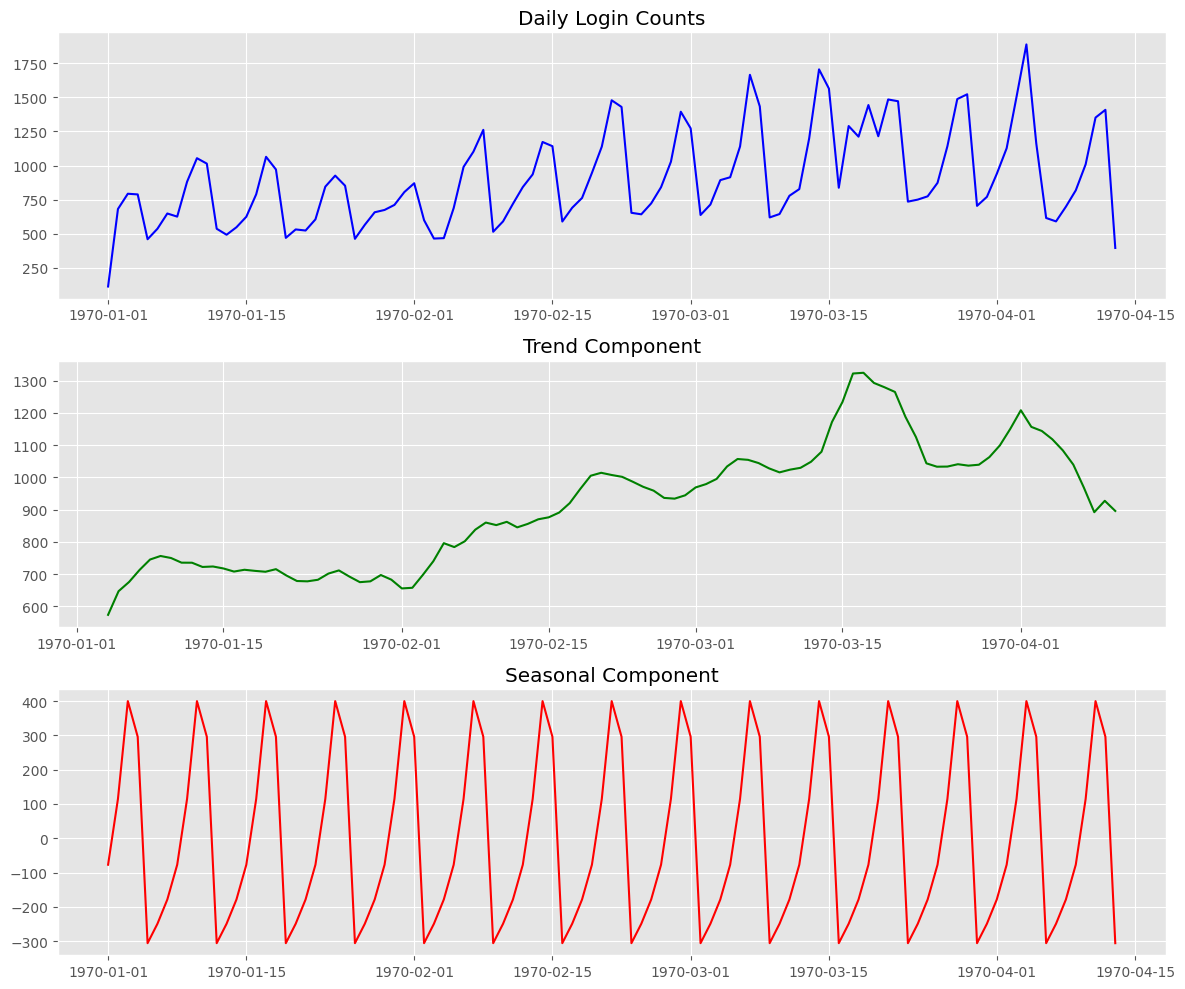

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate login counts based on 15-minute time intervals
login_counts = df.resample('D').size()

# Decompose the time series into its components
decomposition = seasonal_decompose(login_counts, model='additive')
# Plot the decomposed components
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Original time series plot
axs[0].plot(login_counts, color='b')
axs[0].set_title('Daily Login Counts')

# Trend component plot
axs[1].plot(decomposition.trend, color='g')
axs[1].set_title('Trend Component')

# Seasonal component plot
axs[2].plot(decomposition.seasonal, color='r')
axs[2].set_title('Seasonal Component')

plt.tight_layout()
plt.show()

### Monthly Trend Analysis

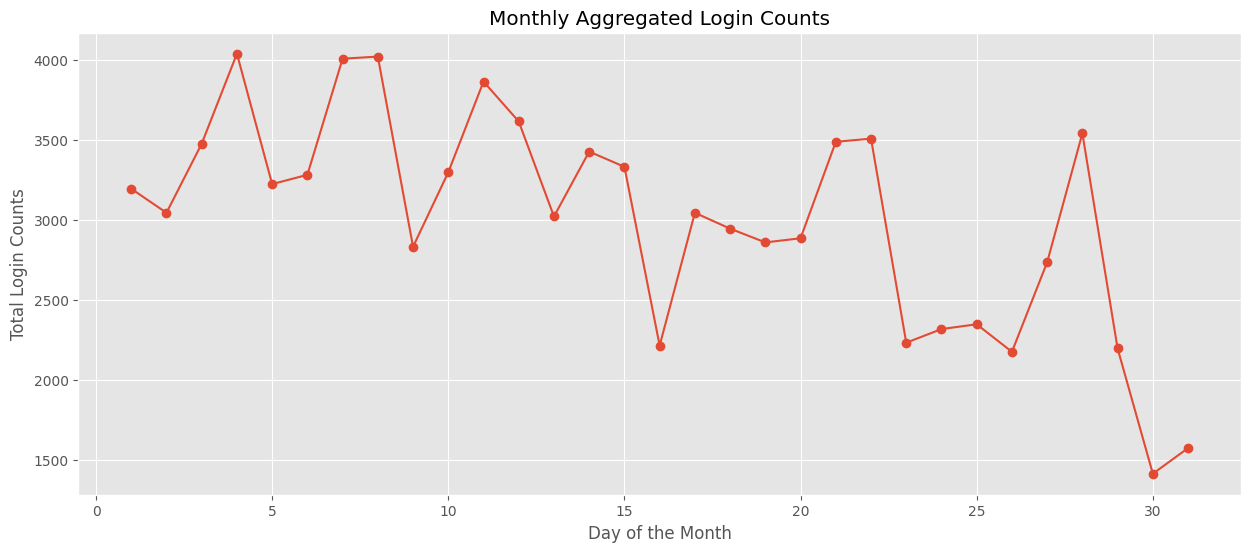

In [8]:
# Group the data by the day of each month
monthly_login_counts = login_counts.groupby(login_counts.index.day).sum()

# Plot the time series of hourly aggregated login counts
plt.figure(figsize=(15, 6))
plt.plot(monthly_login_counts, marker='o')
plt.title('Monthly Aggregated Login Counts')
plt.xlabel('Day of the Month')
plt.ylabel('Total Login Counts')
plt.grid(True)
plt.show()

#### Ploting data by each month

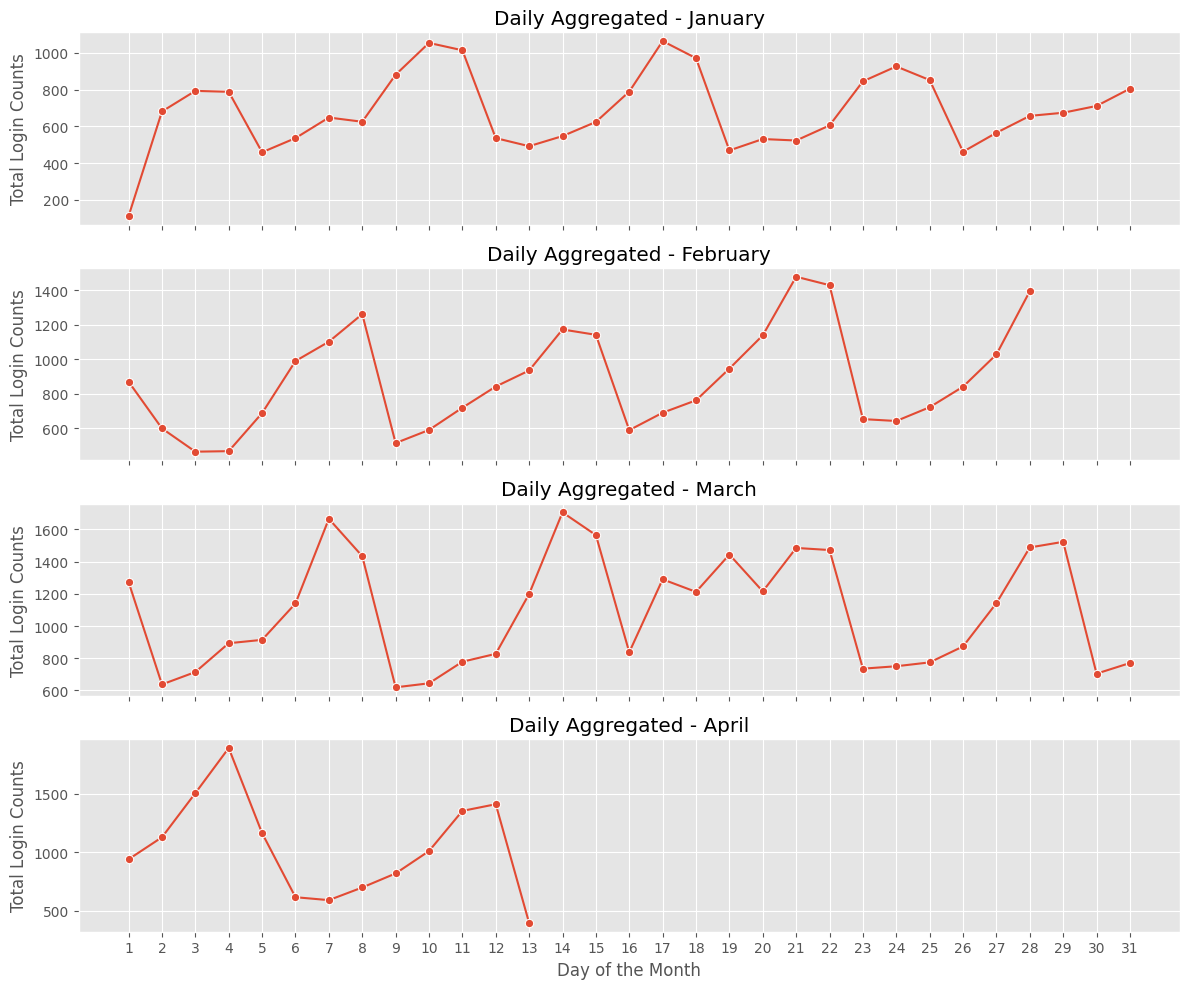

In [9]:
# Find 
months = login_counts.index.strftime('%B').unique()
fig, axs = plt.subplots(len(months),1, sharex=True, figsize=(12, 10))

for i, month in enumerate(months):
    plt.subplot(len(months),1, i+1 )
    month_data = login_counts[login_counts.index.strftime('%B')==month]
    day_data = month_data.groupby(month_data.index.day).mean()
    
    # Plotting the data
    sns.lineplot(data=day_data, marker='o')
    
    # Adding title, labels, and ticks
    plt.title(f'Daily Aggregated - {month}')
    plt.xlabel('Day of the Month')
    plt.ylabel('Total Login Counts')
    plt.xticks(range(1, 32))

plt.tight_layout()
plt.show()

### Weekly Trend Analysis

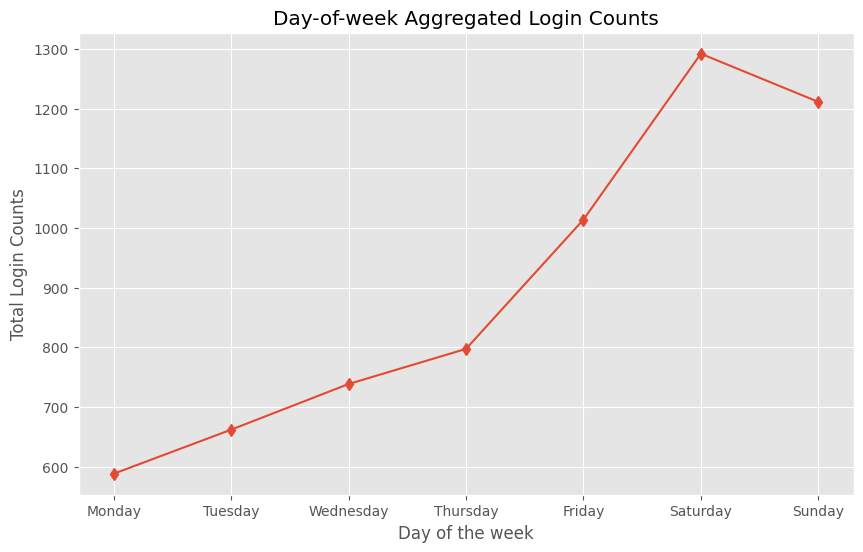

In [10]:
# Resample the data to daily intervals and calculate the total login counts for each day
weekly_login_counts = login_counts.groupby(login_counts.index.dayofweek).mean()

# Define the labels for each day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the time series day-of-week aggregated login counts
plt.figure(figsize=(10, 6))
plt.plot(weekly_login_counts, marker='d')
plt.title('Day-of-week Aggregated Login Counts')
plt.xlabel('Day of the week')
plt.ylabel('Total Login Counts')
plt.xticks(range(7),days_of_week)
plt.grid(True)
plt.show()

### Hourly Trend Analysis

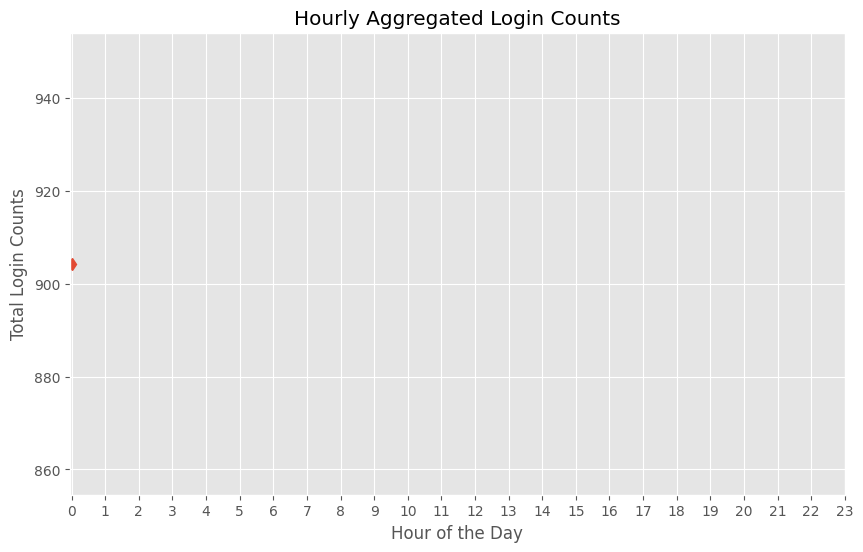

In [11]:
# Group the data by the hour component of the timestamp index and calculate the total login counts for each hour of the day
hourly_login_counts = login_counts.groupby(login_counts.index.hour).mean()

# Plot the time series of hourly aggregated login counts
plt.figure(figsize=(10, 6))
plt.plot(hourly_login_counts, marker='d')
plt.title('Hourly Aggregated Login Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Login Counts')
plt.xticks(range(24))
plt.grid(True)
plt.show()

### **Findings:**

- **The analysis of both the 15-minute and daily trends reveals a seasonal and positive trending pattern in the login data.**
- **In the monthly plot, it is evident that the first two weeks of the month experience higher login activity.**
- **The weekly plot indicates that Saturday sees the highest number of logins, followed by Sunday, while Monday registers the lowest activity.**
- **Further investigation into specific hours shows that the most logged periods occur from 9 am to 12 pm and from 10 pm to 4 am.**

## **Part 2 ‐ Experiment and metrics design**

1. ***Key Measure of Success:***
The key measure of success for this experiment would be the increase in the number of driver partners who regularly serve both cities (Gotham and Metropolis) after the toll reimbursement policy is implemented. This metric is crucial because it directly measures the desired behavior change among driver partners and reflects the success of the policy in encouraging cross-city service. 

2. ***Practical Experiment Design:***
- **Implementation of the Experiment:** Track the number of driver partners serving both cities before and after implementing the toll reimbursement policy.

- **Statistical Tests:** Use hypothesis testing, such as a two-sample t-test or chi-square test, to compare the proportion of driver partners serving both cities.

- **Interpretation of Results and Recommendations:** If there is a significant increase in driver partners serving both cities post-implementation, recommend continuing the policy and consider additional incentives for further improvement. Caveats to consider include external factors that may influence driver behavior, seasonality effects, and the need for a sufficient sample size to ensure reliable results.

## **Part 3 ‐ Predictive modeling**

In [12]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


#### 1. Data Cleaning and Exploratory Analysis:

In [13]:
# Summary of the datas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [14]:
df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

- Handling the missing values

In [15]:
# Fill 'avg_rating_by_driver' and 'avg_rating_of_driver' with mean values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(),inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(),inplace=True)

In [16]:
# Drop phone rows with missing values. since its only .07%(less than 1%)
df.dropna(inplace=True)

In [17]:
# Final check for null values
df.isna().any().sum()

0

In [18]:
# Check for duplicate rows
df.duplicated().sum()

8

In [19]:
# Remove duplicated rows from the DataFrame
df.drop_duplicates(inplace=True)

In [20]:
# Convert 'signup_date' and 'last_trip_date' columns to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [21]:
# Replace ultimate black user values with 1 and 0.
df.ultimate_black_user=df.ultimate_black_user.apply(lambda x: 1 if x==True else 0)

In [22]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
trips_in_first_30_days,49596.0,2.277462,0.0,0.0,1.0,3.0,125.0,3.793572
signup_date,49596,2014-01-16 13:02:56.820711424,2014-01-01 00:00:00,2014-01-09 00:00:00,2014-01-17 00:00:00,2014-01-24 00:00:00,2014-01-31 00:00:00,NaN
avg_rating_of_driver,49596.0,4.601442,1.0,4.5,4.7,5.0,5.0,0.565259
avg_surge,49596.0,1.075003,1.0,1.0,1.0,1.05,8.0,0.222682
last_trip_date,49596,2014-04-19 11:35:38.398257664,2014-01-01 00:00:00,2014-02-15 00:00:00,2014-05-08 00:00:00,2014-06-18 00:00:00,2014-07-01 00:00:00,NaN
surge_pct,49596.0,8.876746,0.0,0.0,0.0,8.7,100.0,19.990312
ultimate_black_user,49596.0,0.375212,0.0,0.0,0.0,1.0,1.0,0.484182
weekday_pct,49596.0,60.887604,0.0,33.3,66.7,100.0,100.0,37.082944
avg_dist,49596.0,5.785853,0.0,2.42,3.88,6.93,160.96,5.669961
avg_rating_by_driver,49596.0,4.777826,1.0,4.7,5.0,5.0,5.0,0.446247


#### EDA

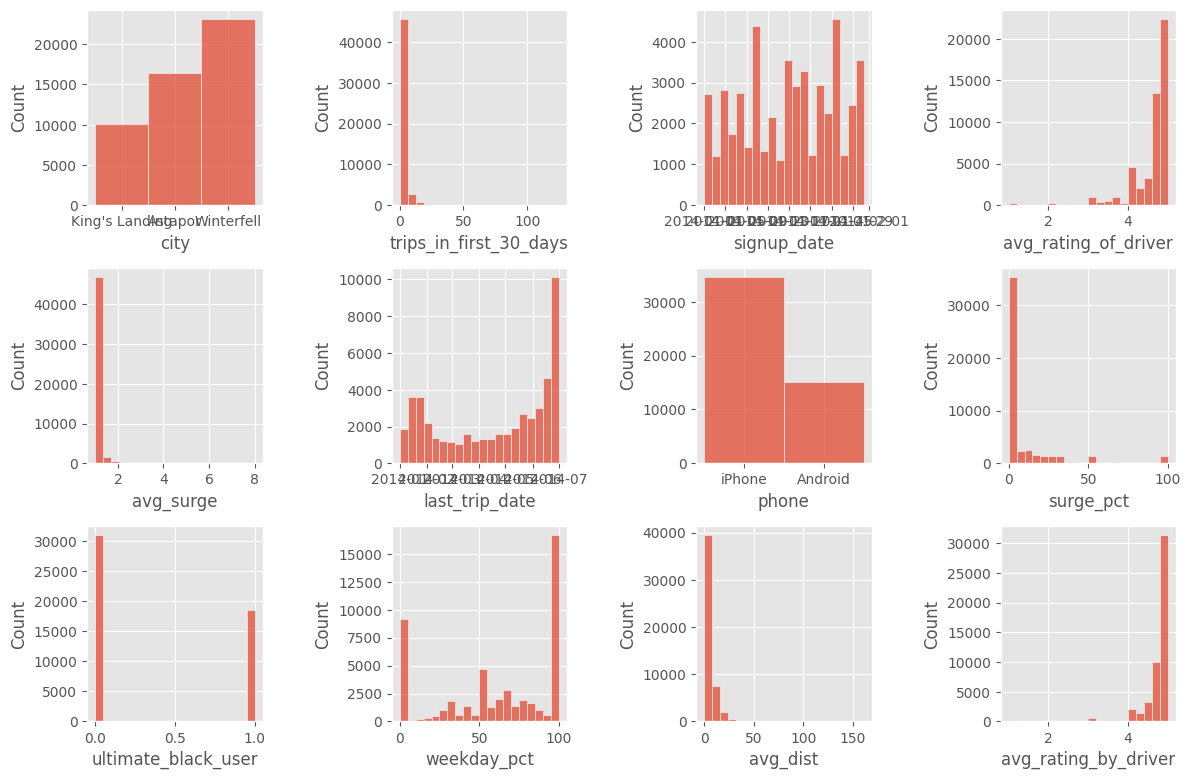

In [23]:
# Explore the distribution of numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(df):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col],bins=20)
plt.tight_layout()
plt.show()

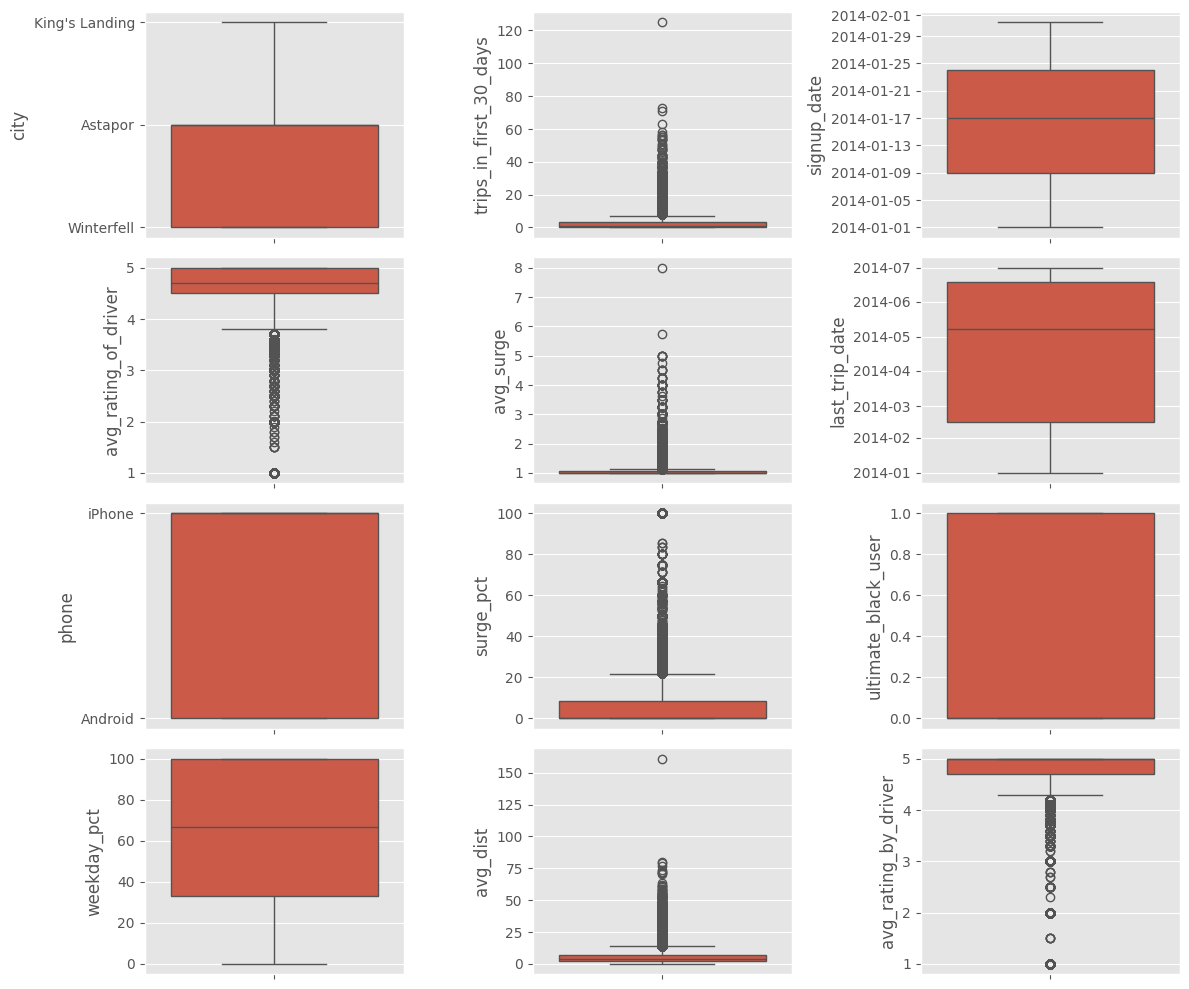

In [24]:
# Explore the outliers of numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(df):
    plt.subplot(4, 3, i+1)
    sns.boxplot(df[col])
plt.tight_layout()
plt.show()

- Removing outliers

In [25]:
# Removing few outliers
df = df[df['trips_in_first_30_days'] <= 100]
df = df[df['avg_dist'] <= 100]

### Adding new columns:
- 'userActive': 1: if user has taken trips in last 30 days else 0
- days_since_signup: days since signup
- days_since_last_trip : days since last trip taken

In [26]:
from datetime import datetime, timedelta

# Get the current date. which is last date in this case
current_date = df['last_trip_date'].max()
print("last login - ",current_date)

#Days since last trip
df['days_since_signup'] = (current_date - df['signup_date']).dt.days
#Days since last trip
df['days_since_last_trip'] = (current_date - df['last_trip_date']).dt.days

# Define a threshold of 30 days
threshold = 30

# Create the 'userActive' column based on last trip date
df['userActive'] =  (df['days_since_last_trip'] <= threshold).astype(int)
df.userActive.value_counts()

last login -  2014-07-01 00:00:00


userActive
0    30925
1    18669
Name: count, dtype: int64

### --- Some Final EDA

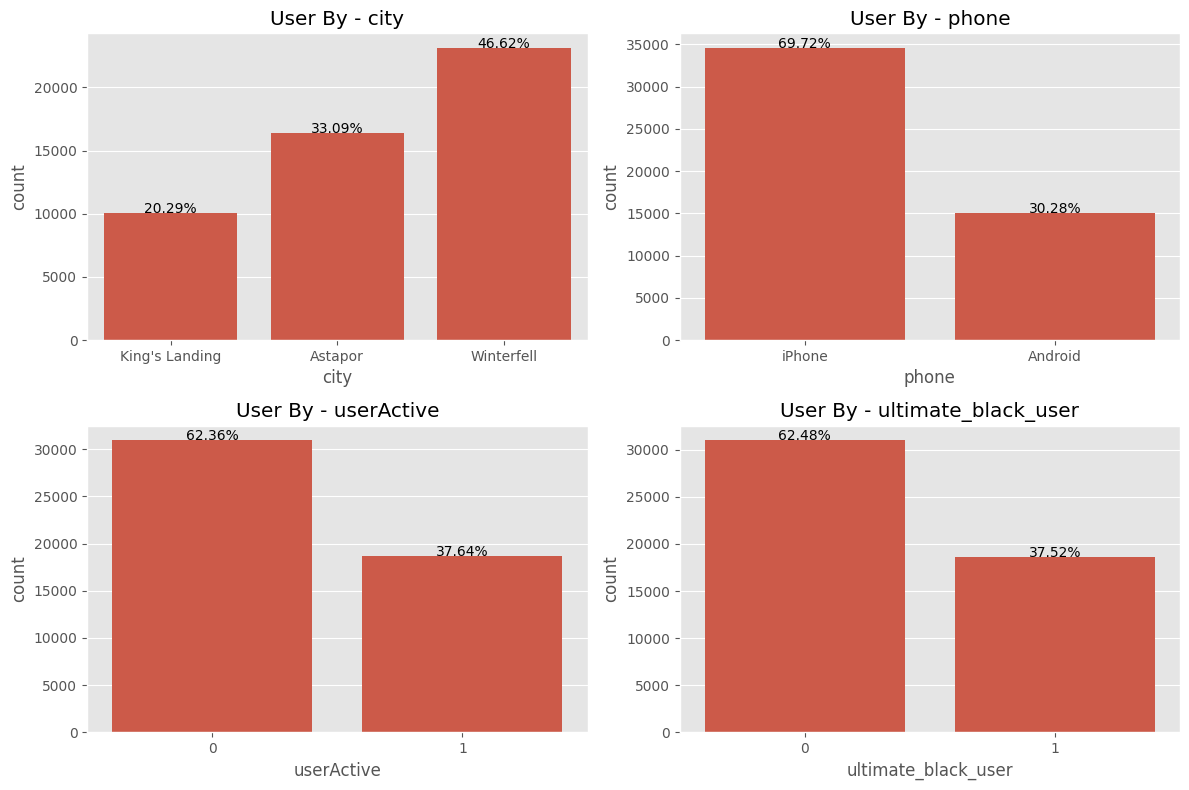

In [27]:
plt.figure(figsize=(12, 8))

columns = ['city', 'phone', 'userActive','ultimate_black_user']

for i, col in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    ax = sns.countplot(x=df[col],data=df)
    plt.title(f'User By - {col}')
    total = len(df[col])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.2f}%'.format((height / total) * 100), ha="center")

plt.tight_layout()
plt.show()

### **2. Building Predictive Model:**

- **Featuring Engineering**

In [28]:
# Convert 'city' and 'phone' columns into dummy variables
df = pd.get_dummies(df, columns=['city', 'phone'], dtype=int)
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_signup,days_since_last_trip,userActive,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,157,14,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,153,57,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,176,175,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,172,2,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,155,108,0,0,0,1,1,0


In [29]:
#creating new final dataset.
df_final = df.drop(['signup_date','last_trip_date'], axis = 1)
df_final.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_signup,days_since_last_trip,userActive,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,157,14,1,0,1,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,153,57,0,1,0,0,1,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,176,175,0,1,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,172,2,1,0,1,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,155,108,0,0,0,1,1,0


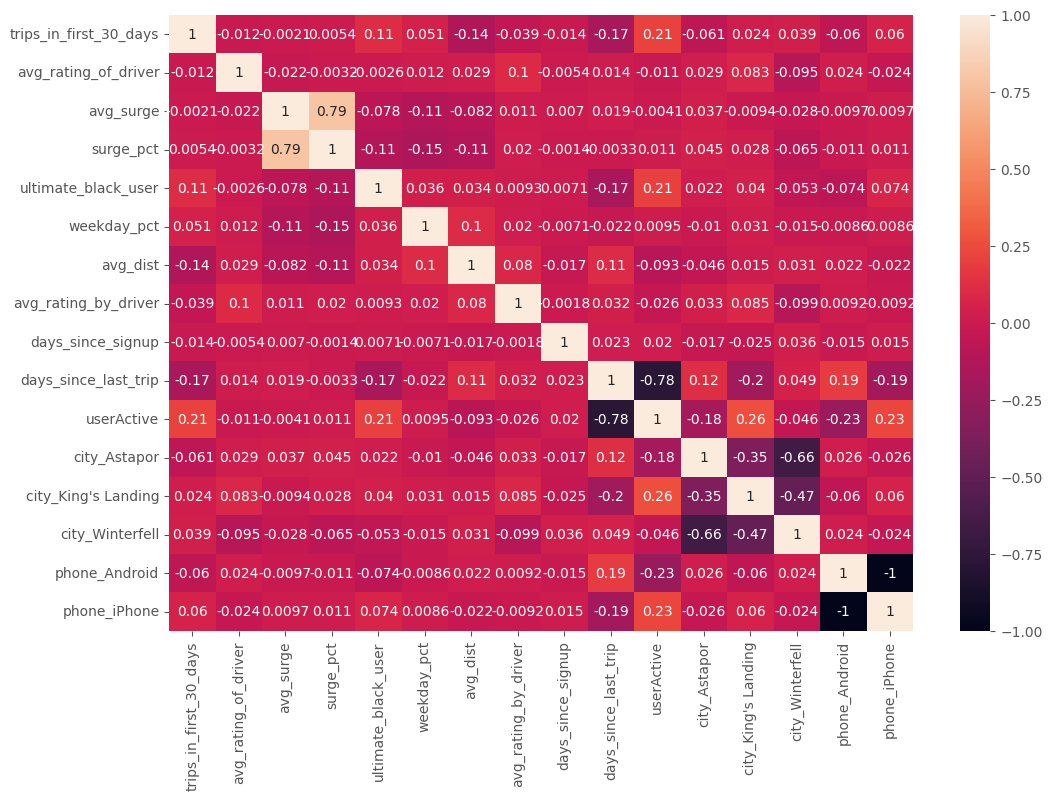

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df_final.corr(),annot=True);

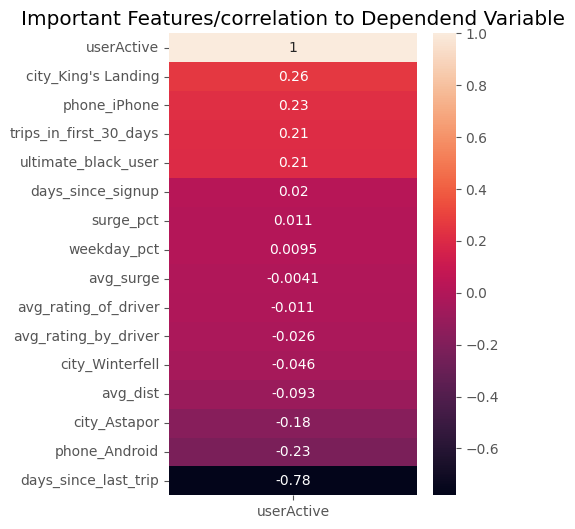

In [31]:
## Focusing only on Target valriable 
plt.figure(figsize=(4,6))
sns.heatmap(df_final.corr(numeric_only=True)[['userActive']].sort_values(by ='userActive',ascending = False),annot=True)
plt.title('Important Features/correlation to Dependend Variable')
plt.show()

### Modelling 

In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define X (features) and y (target)
X = df_final.drop('userActive', axis=1)
y = df_final['userActive']
#scaled 

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

#spliting train and test data
X_train, X_test, y_train, y_test = train_test_split(X_Scaled,y,test_size=.1,random_state=37)


#### Applying Three different models 

In [33]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Define the models and their respective parameter grids
models = {
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {}
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 5, 10]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'learning_rate': [0.1, 0.05, 0.01]
        }
    }
}

# Apply GridSearchCV for each model
for model_name, model_params in models.items():
    grid_search = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Display best parameters and score for each model
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")

Best parameters for logistic_regression: {}
Best cross-validation score for logistic_regression: 0.9948021697438287
Best parameters for random_forest: {'max_depth': None, 'n_estimators': 10}
Best cross-validation score for random_forest: 1.0
Best parameters for gradient_boosting: {'learning_rate': 0.1, 'n_estimators': 10}
Best cross-validation score for gradient_boosting: 1.0


Applying the Random Forest Model

In [37]:
# Applying Random Forest model
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

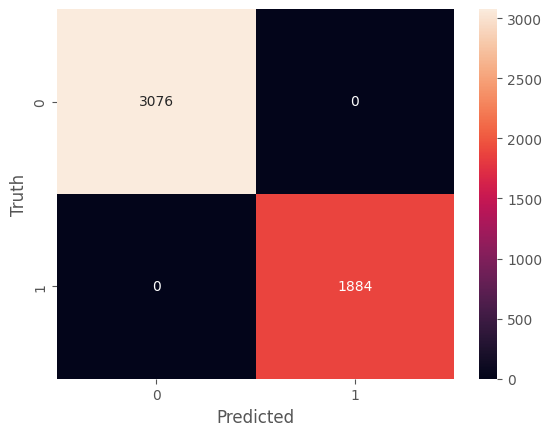

In [54]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)),fmt="", annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [38]:
from sklearn.metrics import classification_report

print(classification_report(model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3076
           1       1.00      1.00      1.00      1884

    accuracy                           1.00      4960
   macro avg       1.00      1.00      1.00      4960
weighted avg       1.00      1.00      1.00      4960



**Conclusion:**
- **Since the Randomforest model achieved the perfect accuarcy (1.0) on the validation set, indicating that it correctly predicted whether a user will be active or not, We can directly use this model for prediction. RandomForest is a good choice for classification tasks as it produces accurate results and is robust to overfitting.**

### **3. Leveraging Insights for Long-Term Rider Retention:**

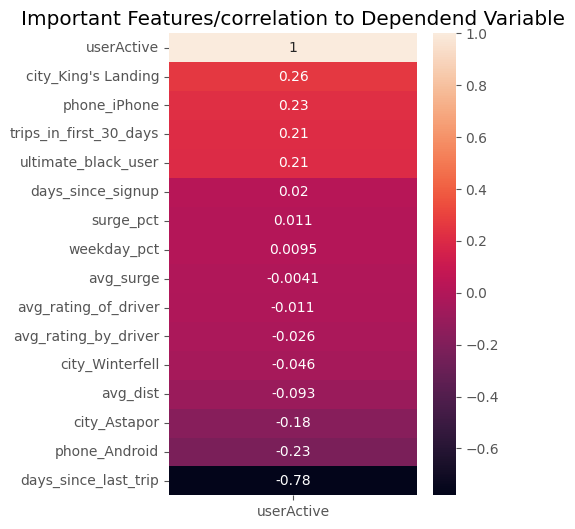

In [36]:
## Correlation of independent variables to Target valriable 
plt.figure(figsize=(4,6))
sns.heatmap(df_final.corr(numeric_only=True)[['userActive']].sort_values(by ='userActive',ascending = False),annot=True)
plt.title('Important Features/correlation to Dependend Variable')
plt.show()

**To improve long-term rider retention, Ultimate can leverage the insights gained from the model in the following ways:**

1. **Target King's Landing Users**: Focus on marketing efforts, promotions, and incentives for users in King's Landing to enhance retention.
    
2. **Prioritize iPhone Users**: Develop features for iPhone users to enhance retention.
    
3. **Promote Ultimate Black Usage**: Offer benefits to increase Ultimate Black membership and retention.
    
4. **Enhance Early Engagement**: Provide a positive experience in the first 30 days to retain users long term.
    
5. **Combat User Inactivity**: Implement re-engagement campaigns for inactive users to prevent churn.

By acting on these insights, Ultimate can improve customer satisfaction and increase user engagement, thereby enhancing long-term rider retention.